# Data Mining in Public Transportation
## -- Take BART as an Example
(COSC 5010 Final Project)

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

# plt.style.use('ggplot')
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

__author__    = 'Libao Jin'
__date__      = '04/24/2018'
__email__     = 'ljin1@uwyo.edu'
__copyright__ = 'Copyright (c) 2018 Libao Jin'

In [2]:
#####################################################################################
# Load data
#####################################################################################

# Data obtained on 03/25, source: https://www.kaggle.com/saulfuh/bart-ridership
date_hour_2016 = '../data/bart-ridership/date-hour-soo-dest-2016.csv'
date_hour_2017 = '../data/bart-ridership/date-hour-soo-dest-2017.csv'
stat_info = '../data/bart-ridership/station_info.csv'

# bart_16 = pd.read_csv(date_hour_2016)
# bart_17 = pd.read_csv(date_hour_2017)
# stat = pd.read_csv(stat_info)

#####################################################################################
# Data preprocessing
#####################################################################################

def bart_preprocess(bart):
    # Convert string to datetime, split datetime into date and time, and get day of week
    bart['DateTime'] = pd.to_datetime(bart.DateTime)
    bart['Date'] = bart['DateTime'].dt.date
    bart['Time'] = bart['DateTime'].dt.time
    bart['DayOfWeek'] = bart['DateTime'].dt.weekday_name
    # bart.drop(columns='DateTime')
    return bart

def stat_preprocess(stat):
    # Split location into longitude and latitude for visualization later on
    loc = stat.Location.str.split(',', expand=True)
    loc = [pd.to_numeric(loc[i]) for i in loc.columns]
    stat['Longitude'], stat['Latitude'] = loc[0], loc[1]
    columns = ['Abbreviation', 'Name', 'Longitude', 'Latitude', 'Description']
    stat = stat[columns]
    return stat

bart_16 = bart_preprocess(pd.read_csv(date_hour_2016))
bart_17 = bart_preprocess(pd.read_csv(date_hour_2017))
bart = pd.concat([bart_16, bart_17], ignore_index=True)
stat = stat_preprocess(pd.read_csv(stat_info))

## Route Visualization

* https://railways.socialcops.com
* https://mapzen.com/blog/animating-transitland/
* https://github.com/transitland/transitland-processing-animation

Get the stations of five lines from [BART stations](https://www.bart.gov/schedules/bystation)

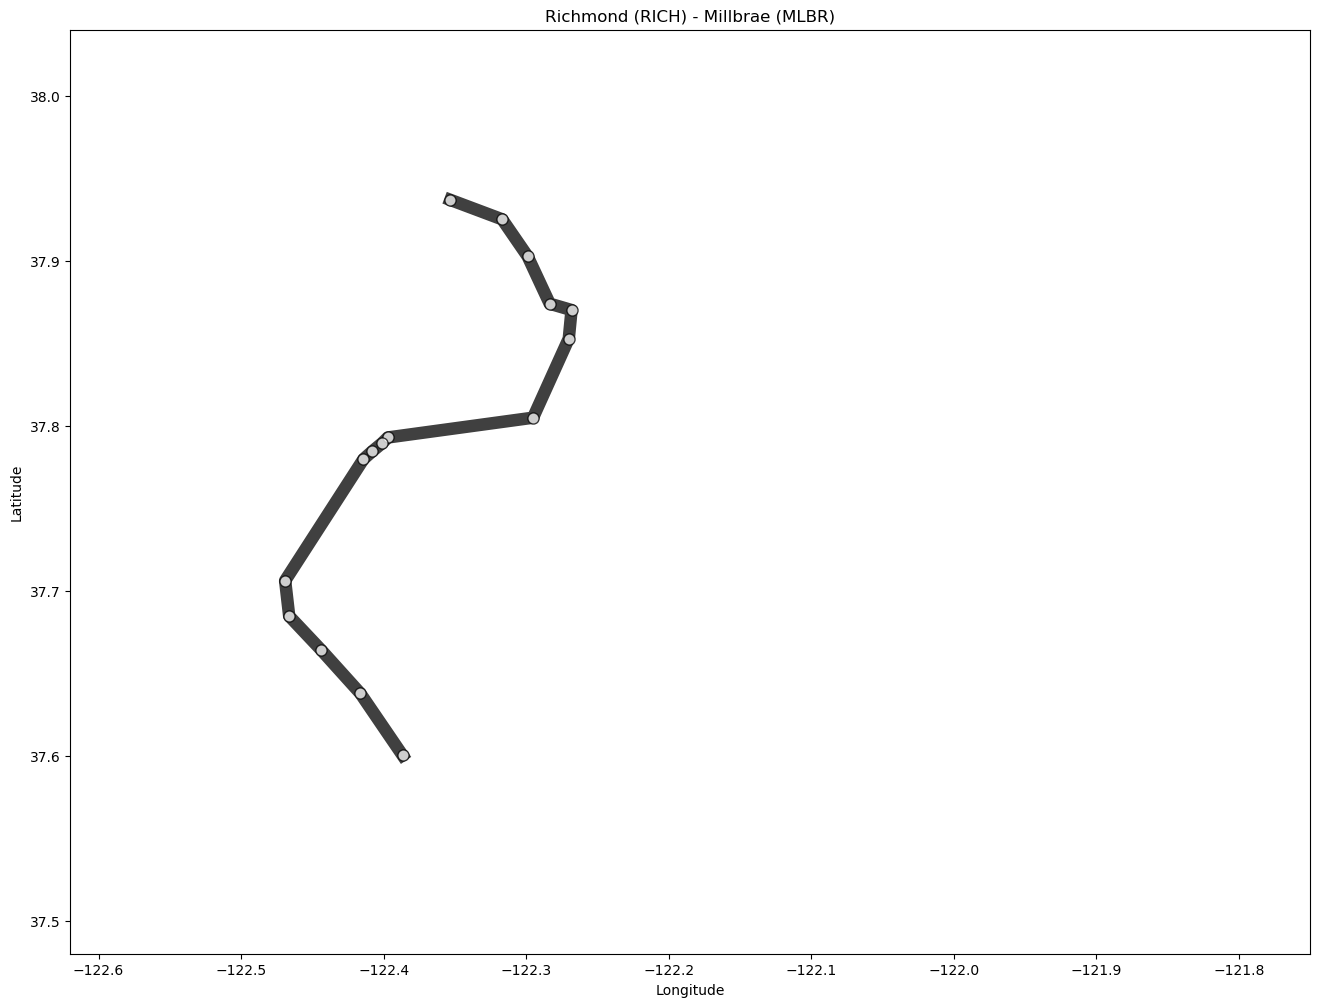

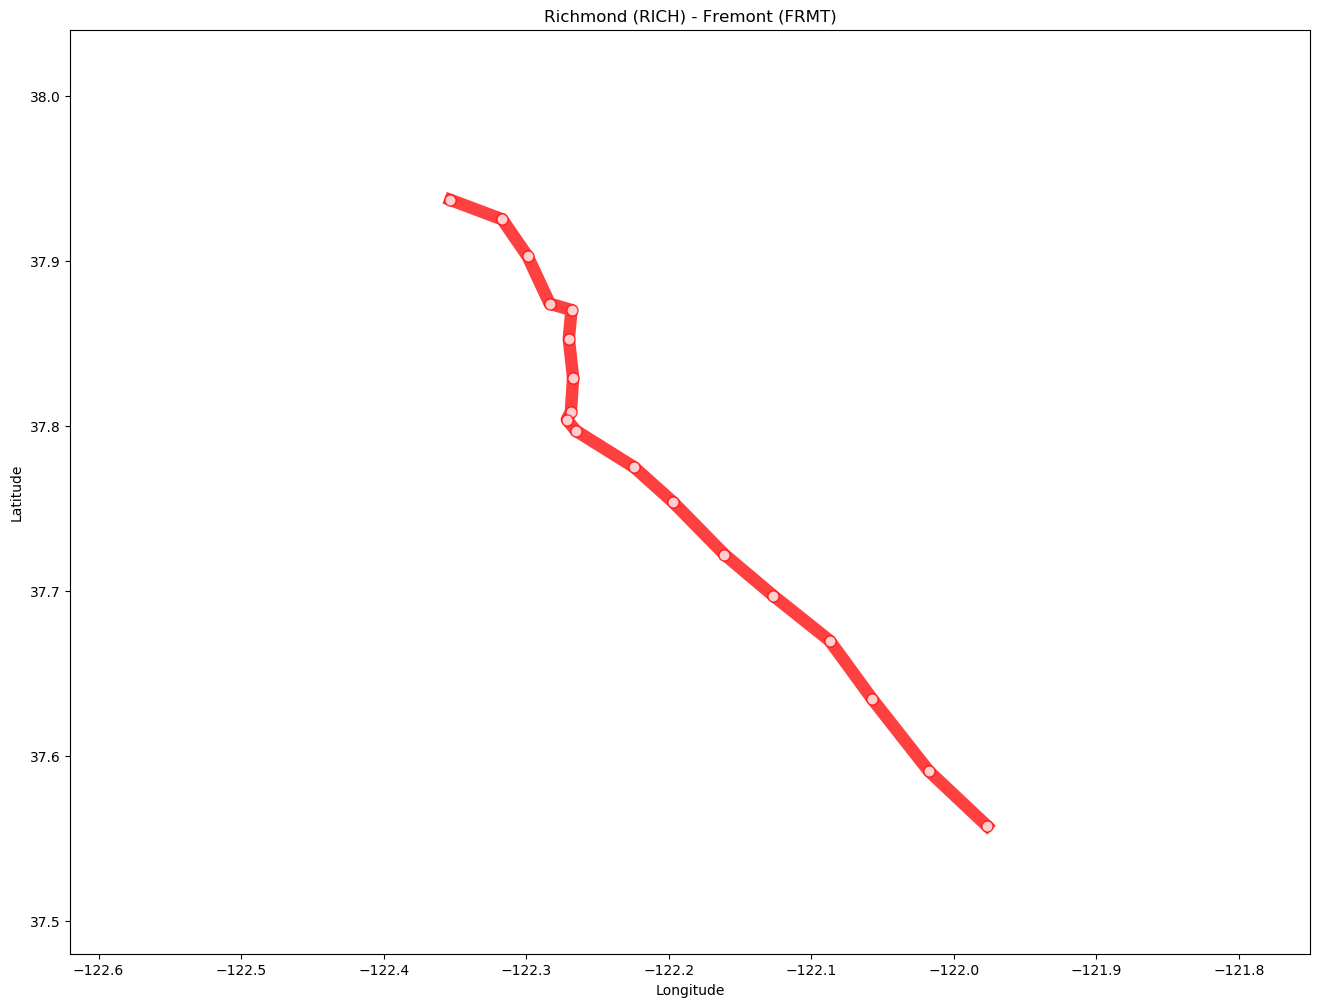

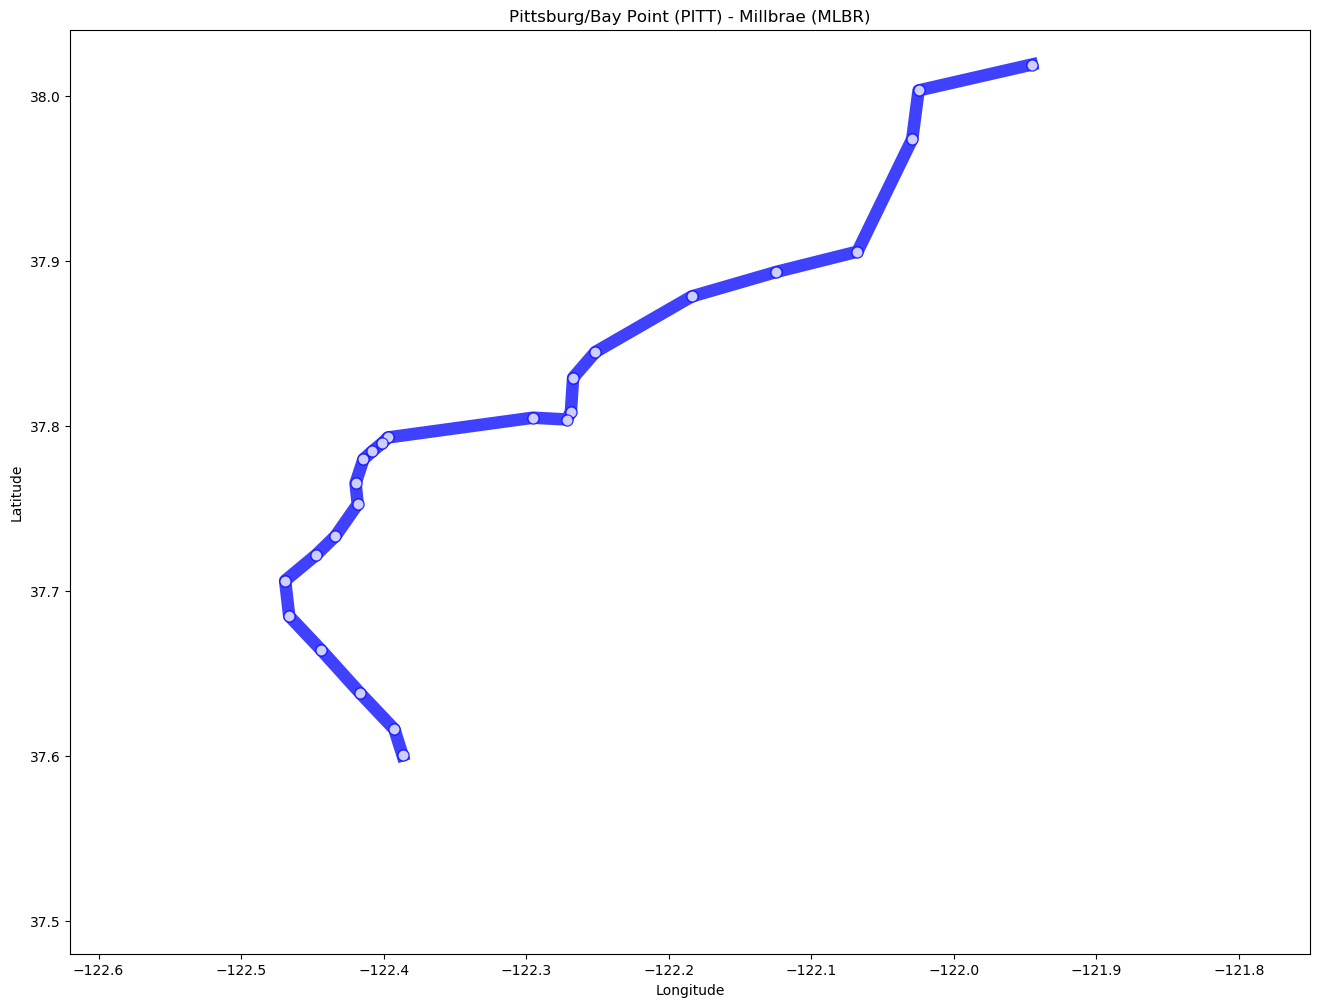

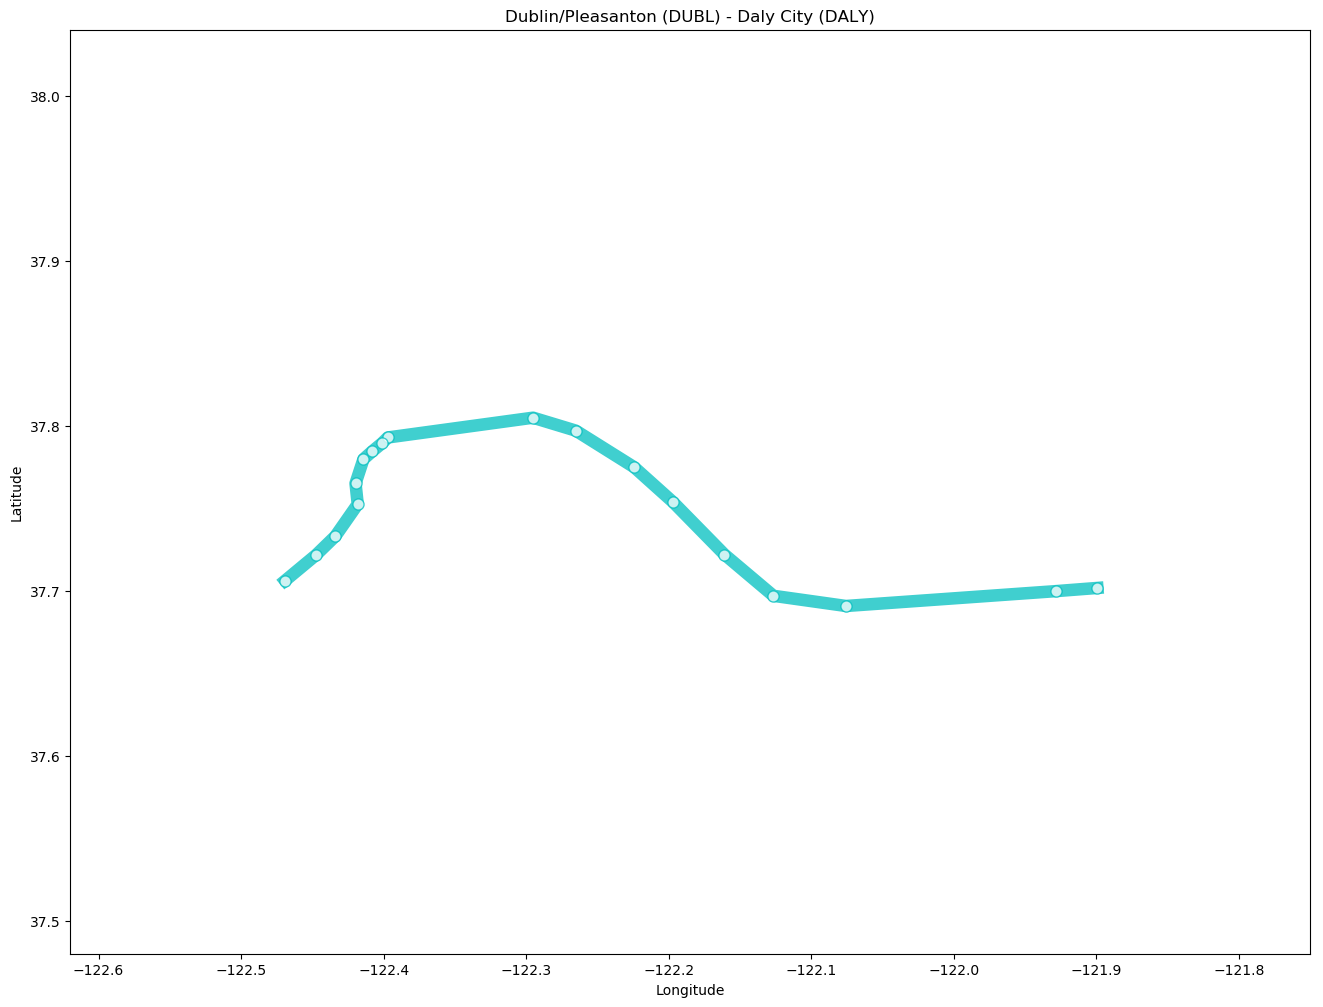

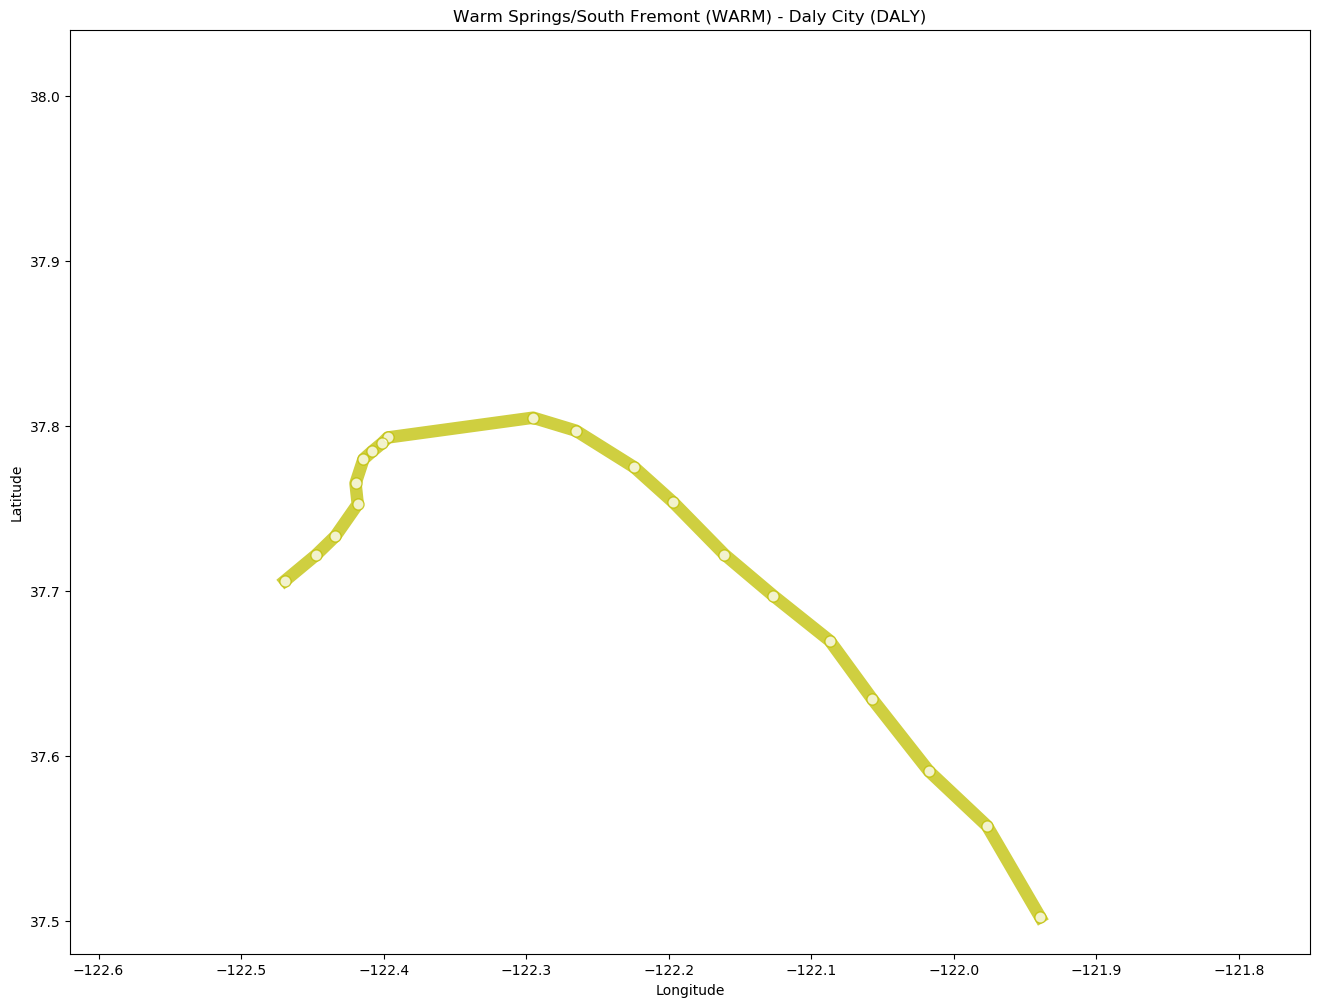

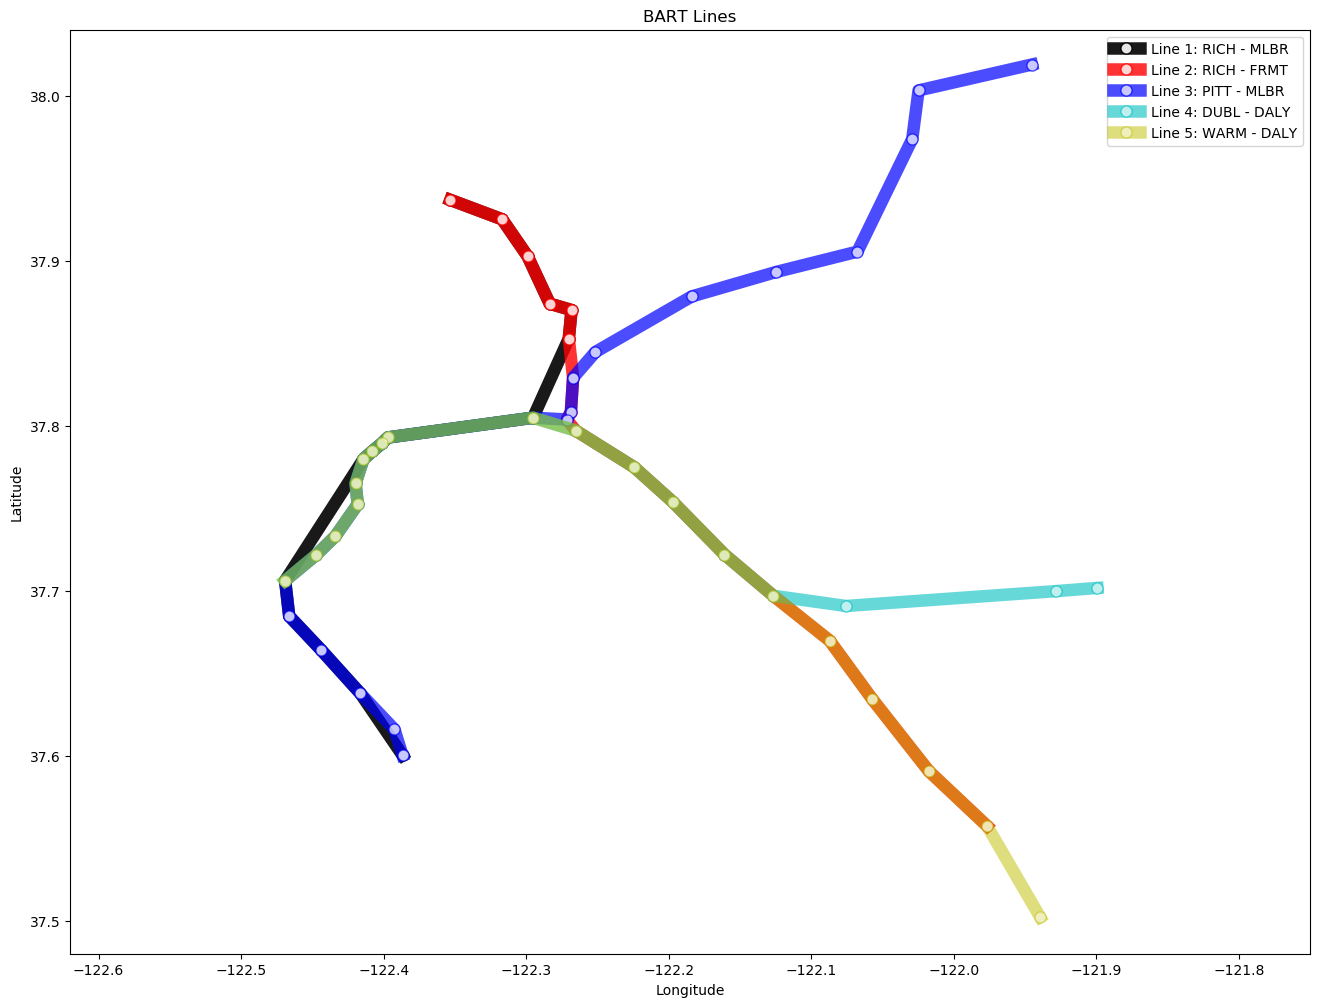

In [3]:
#####################################################################################
# Visualize the routes according to the BART official website
#####################################################################################


def generate_bart_routes(bart_lines, stat):
    bart_routes = []
    
    for line in bart_lines:
    
        abbr = []
        name = []
        fullname = []
        location = []
    
        for station in line:
            tmp = stat[stat['Name'].str.contains(station)]
            abbr.append(tmp.iloc[0]['Abbreviation'])
            name.append(station)
            fullname.append(tmp.iloc[0]['Name'])
            location.append([tmp.iloc[0]['Longitude'], tmp.iloc[0]['Latitude']])
    
        bart_routes.append({
            'abbr': abbr,
            'name': name,
            'fullname': fullname,
            'location': location
        })
    return bart_routes


def visualize_bart_routes(bart_routes):
    color = list('krbcy')
    alpha = [0.9, 0.8, 0.7, 0.6, 0.5]
    x_min, x_max, y_min, y_max = -122.62, -121.75, 37.48, 38.04
    
    plt.style.use('default')
    for i in range(len(bart_routes)):
        plt.figure(figsize=(16, 12))
        loc = np.array(bart_routes[i]['location'])
        # x, y = loc[:, 0], loc[:, 1]
        # plt.plot(x, y, '-o', c=color[i], ms=6, lw=4, alpha=0.5)
        plt.plot(
            loc[:, 0],
            loc[:, 1],
            '-o',
            c=color[i],
            mfc='w',
            ms=8,
            lw=9,
            alpha=0.75
        )
        plt.xlim([x_min, x_max])
        plt.ylim([y_min, y_max])
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        title = bart_routes[i]['fullname'][0] + ' - ' + bart_routes[i]['fullname'][-1]
        plt.title(title)
        plt.show()
        
    plt.figure(figsize=(16, 12))
    for i in range(len(bart_routes)):
        loc = np.array(bart_routes[i]['location'])
        label = 'Line {:d}: '.format(i + 1) + bart_routes[i]['abbr'][0] + ' - ' + bart_routes[i]['abbr'][-1]
        # x, y = loc[:, 0], loc[:, 1]
        # plt.plot(x, y, '-o', c=color[i], ms=6, lw=4, alpha=0.5)
        plt.plot(
            loc[:, 0],
            loc[:, 1],
            '-o',
            c=color[i],
            mfc='w',
            ms=8,
            lw=9,
            alpha=alpha[i],
            label=label
        )
    plt.legend()
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('BART Lines')
    plt.show()
    # plt.axis('equal')

    
line_1 = [
    'Richmond',
    'El Cerrito del Norte',
    'El Cerrito Plaza',
    'North Berkeley',
    'Downtown Berkeley',
    'Ashby',
    'West Oakland',
    'Embarcadero',
    'Montgomery St.',
    'Powell St.',
    'Civic Center/UN Plaza',
    'Daly City',
    'Colma',
    'South San Francisco',
    'San Bruno',
    'Millbrae'
]

line_2 = [
    'Richmond',
    'El Cerrito del Norte',
    'El Cerrito Plaza',
    'North Berkeley',
    'Downtown Berkeley',
    'Ashby',
    'MacArthur',
    '19th St. Oakland',
    '12th St. Oakland City Center',
    'Lake Merritt',
    'Fruitvale',
    'Coliseum/Oakland Airport',
    'San Leandro',
    'Bay Fair',
    'Hayward',
    'South Hayward',
    'Union City',
    'Fremont'
]

line_3 = [
    'Pittsburg/Bay Point',
    'North Concord/Martinez',
    'Concord',
    'Walnut Creek',
    'Lafayette',
    'Orinda',
    'Rockridge',
    'MacArthur',
    '19th St. Oakland',
    '12th St. Oakland City Center',
    'West Oakland',
    'Embarcadero',
    'Montgomery St.',
    'Powell St.',
    'Civic Center/UN Plaza',
    '16th St. Mission',
    '24th St. Mission',
    'Glen Park',
    'Balboa Park',
    'Daly City',
    'Colma',
    'South San Francisco',
    'San Bruno',
    "San Francisco Int'l Airport",
    'Millbrae'
]

line_4 = [
    'Dublin/Pleasanton',
    'West Dublin/Pleasanton',
    'Castro Valley',
    'Bay Fair',
    'San Leandro',
    'Coliseum/Oakland Airport',
    'Fruitvale',
    'Lake Merritt',
    'West Oakland',
    'Embarcadero',
    'Montgomery St.',
    'Powell St.',
    'Civic Center/UN Plaza',
    '16th St. Mission',
    '24th St. Mission',
    'Glen Park',
    'Balboa Park',
    'Daly City'
]

line_5 = [
    'Warm Springs/South Fremont',
    'Fremont',
    'Union City',
    'South Hayward',
    'Hayward',
    'Bay Fair',
    'San Leandro',
    'Coliseum/Oakland Airport',
    'Fruitvale',
    'Lake Merritt',
    'West Oakland',
    'Embarcadero',
    'Montgomery St.',
    'Powell St.',
    'Civic Center/UN Plaza',
    '16th St. Mission',
    '24th St. Mission',
    'Glen Park',
    'Balboa Park',
    'Daly City'
]

bart_lines = [
    line_1,
    line_2,
    line_3,
    line_4,
    line_5
]

bart_routes = generate_bart_routes(bart_lines, stat)
visualize_bart_routes(bart_routes)

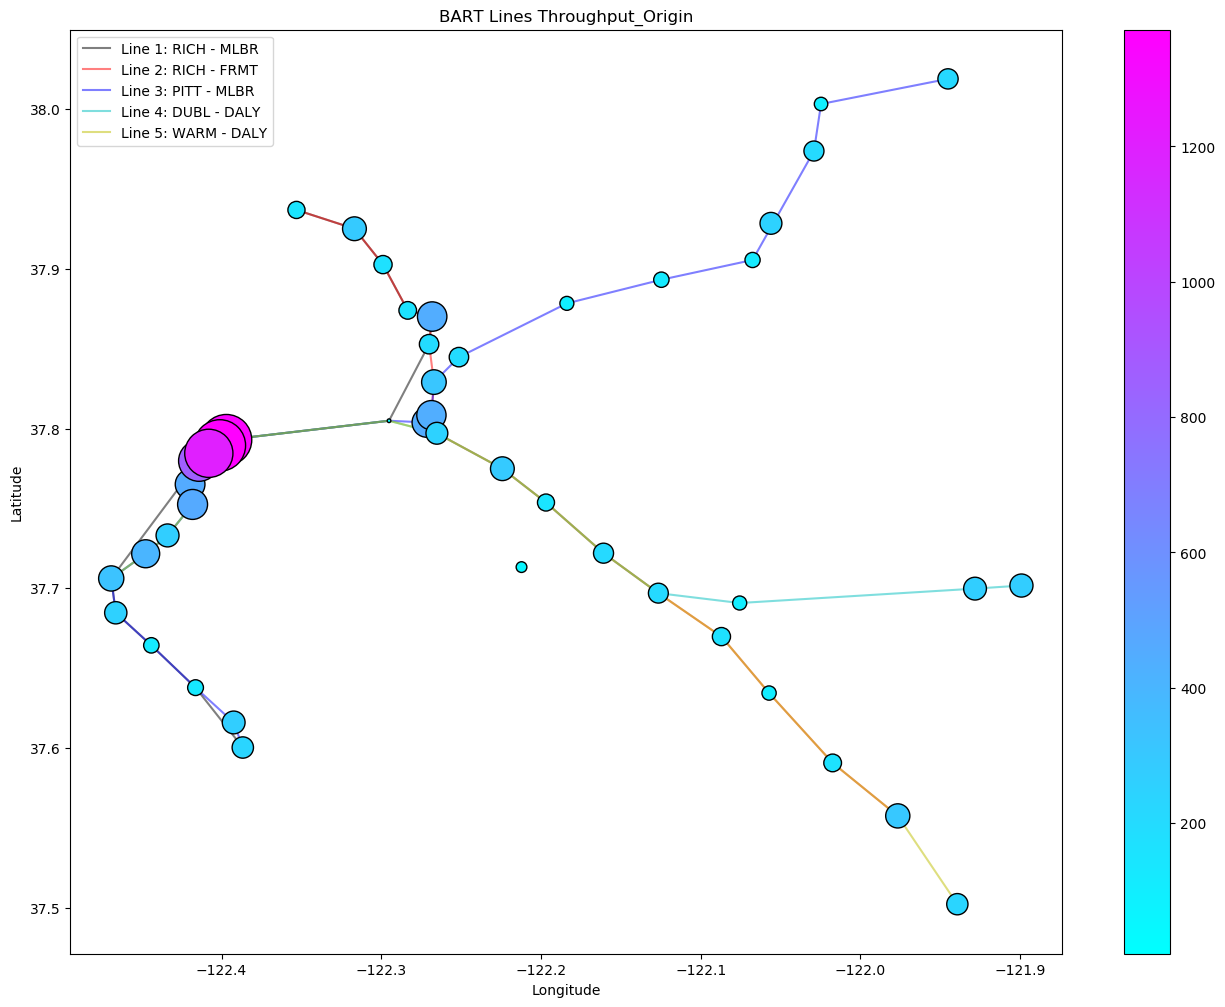

['MONT', 'EMBR', 'POWL', 'CIVC', '24TH', '16TH', '12TH', 'DBRK', '19TH', 'BALB', 'DALY', 'MCAR', 'FRMT', 'DELN', 'FTVL', 'DUBL', 'GLEN', 'WOAK', 'SFIA', 'COLS', 'PHIL', 'LAKE', 'MLBR', 'WCRK', 'PITT', 'CONC', 'SANL', 'BAYF', 'ROCK', 'ASHB', 'PLZA', 'HAYW', 'UCTY', 'NBRK', 'RICH', 'COLM', 'SBRN', 'SSAN', 'LAFY', 'WDUB', 'SHAY', 'CAST', 'ORIN', 'NCON', 'OAKL', 'WSPR']


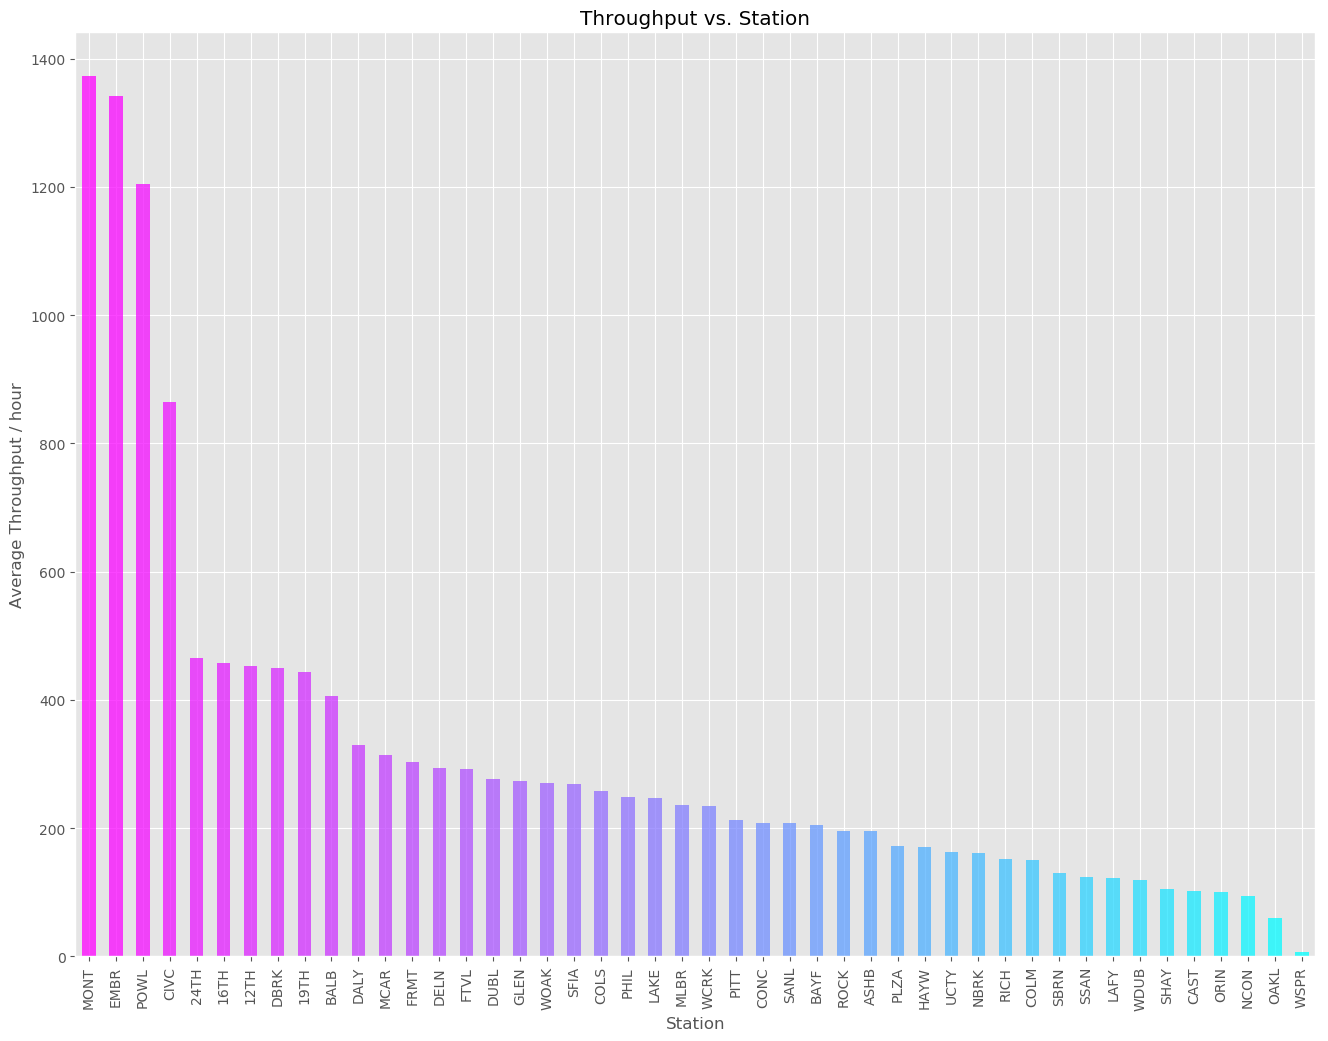

In [4]:
def visualize_throughput(bart_routes, bart_aggregate, column_name):
    color = list('krbcy')
    bart_aggregate = bart_aggregate.set_index('Station')
    x, y = bart_aggregate['Longitude'], bart_aggregate['Latitude']
    n = len(bart_aggregate['Longitude'])
    cmap = mpl.cm.cool
    cs = getattr(bart_aggregate, column_name)
    x_min, x_max, y_min, y_max = -122.62, -121.75, 37.48, 38.04
    plt.figure(figsize=(16, 12))
    plt.style.use('default')
    for i in range(len(bart_routes)):
        loc = np.array(bart_routes[i]['location'])
        label = 'Line {:d}: '.format(i + 1) + bart_routes[i]['abbr'][0] + ' - ' + bart_routes[i]['abbr'][-1]
        # x, y = loc[:, 0], loc[:, 1]
        # plt.plot(x, y, '-o', c=color[i], ms=6, lw=4, alpha=0.5)
        plt.plot(
            loc[:, 0],
            loc[:, 1],
            '-',
            c=color[i],
            # mfc='w',
            # ms=8,
            # lw=6,
            alpha=0.5,
            label=label,
            zorder=1
        )
    plt.legend()
    
    plt.scatter(
        x,
        y,
        c=cs,
        s=cs,
        marker='o',
        edgecolors='k',
        cmap=cmap,
        alpha=1,
        zorder=2
    )
    
    plt.colorbar()
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.axis('equal')
    plt.title('BART Lines ' + cs.name)
    plt.show()
    
    plt.figure(figsize=(16, 12))
    plt.style.use('ggplot')
    bart_aggregate.sort_values(column_name, inplace=True, ascending=False)
    cs = getattr(bart_aggregate, column_name)
    colors = cmap(np.linspace(1, 0, n))
    cs.plot(kind='bar', color=colors, alpha=0.75)
    # print(list(cs.index))
    plt.ylabel('Average Throughput / hour')
    plt.title('Throughput vs. Station')
    plt.show()
    

def bart_aggregate_throughput(bart):
    number_of_days = len(bart['DateTime'].dt.date.unique())
    number_of_hours = len(bart['DateTime'].dt.time.unique())
    bart_grouped = bart['Throughput'].groupby(bart['Origin']).sum().to_frame()
    bart_grouped['Destination'] = bart['Throughput'].groupby(bart['Destination']).sum()
    bart_grouped.index.names=['Station']
    bart_grouped.columns = ['Throughput_Origin', 'Throughput_Destination']
    bart_grouped['Throughput_All'] = bart_grouped['Throughput_Origin'] + bart_grouped['Throughput_Destination']
    bart_grouped.set_index(stat['Abbreviation'])
    bart_grouped.reset_index(level=0, inplace=True)
    bart_grouped['Longitude'] = stat['Longitude']
    bart_grouped['Latitude'] = stat['Latitude']
    bart_grouped[['Throughput_Origin', 'Throughput_Destination', 'Throughput_All']] = bart_grouped[['Throughput_Origin', 'Throughput_Destination', 'Throughput_All']] / (number_of_days * number_of_hours)
    visualize_throughput(bart_routes, bart_grouped, 'Throughput_Origin')
    # visualize_throughput(bart_routes, bart_grouped, 'Throughput_Destination')
    # visualize_throughput(bart_routes, bart_grouped, 'Throughput_All')

# bart_aggregate_throughput(bart_16)
# bart_aggregate_throughput(bart_17)
bart_aggregate_throughput(bart)

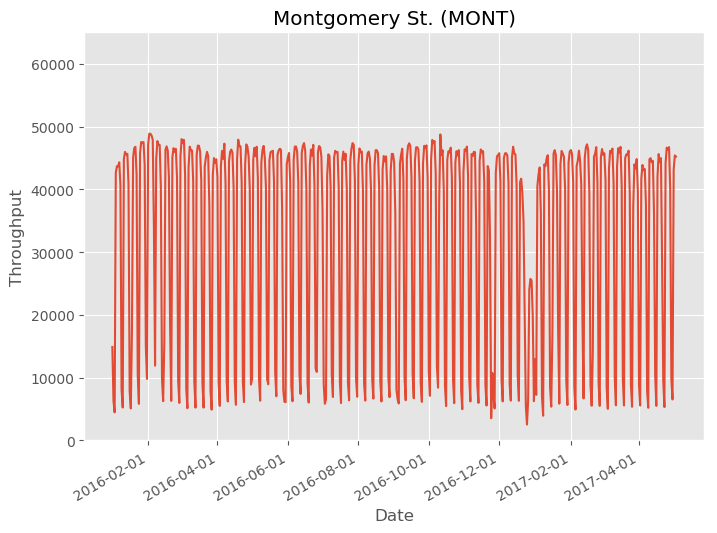

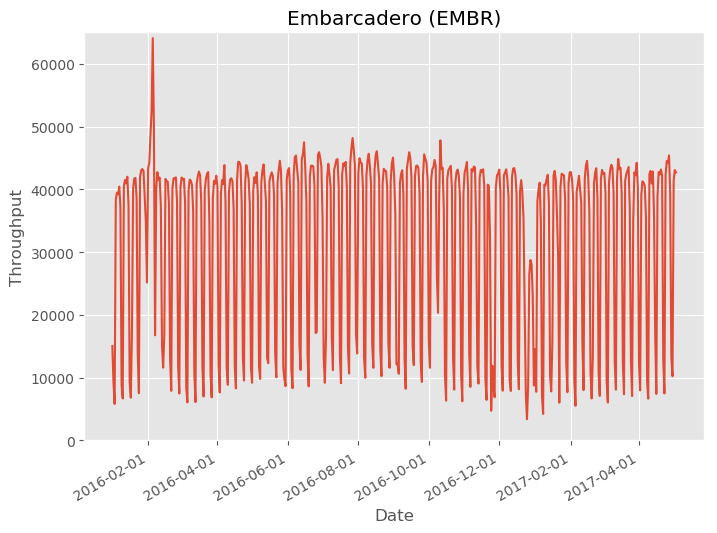

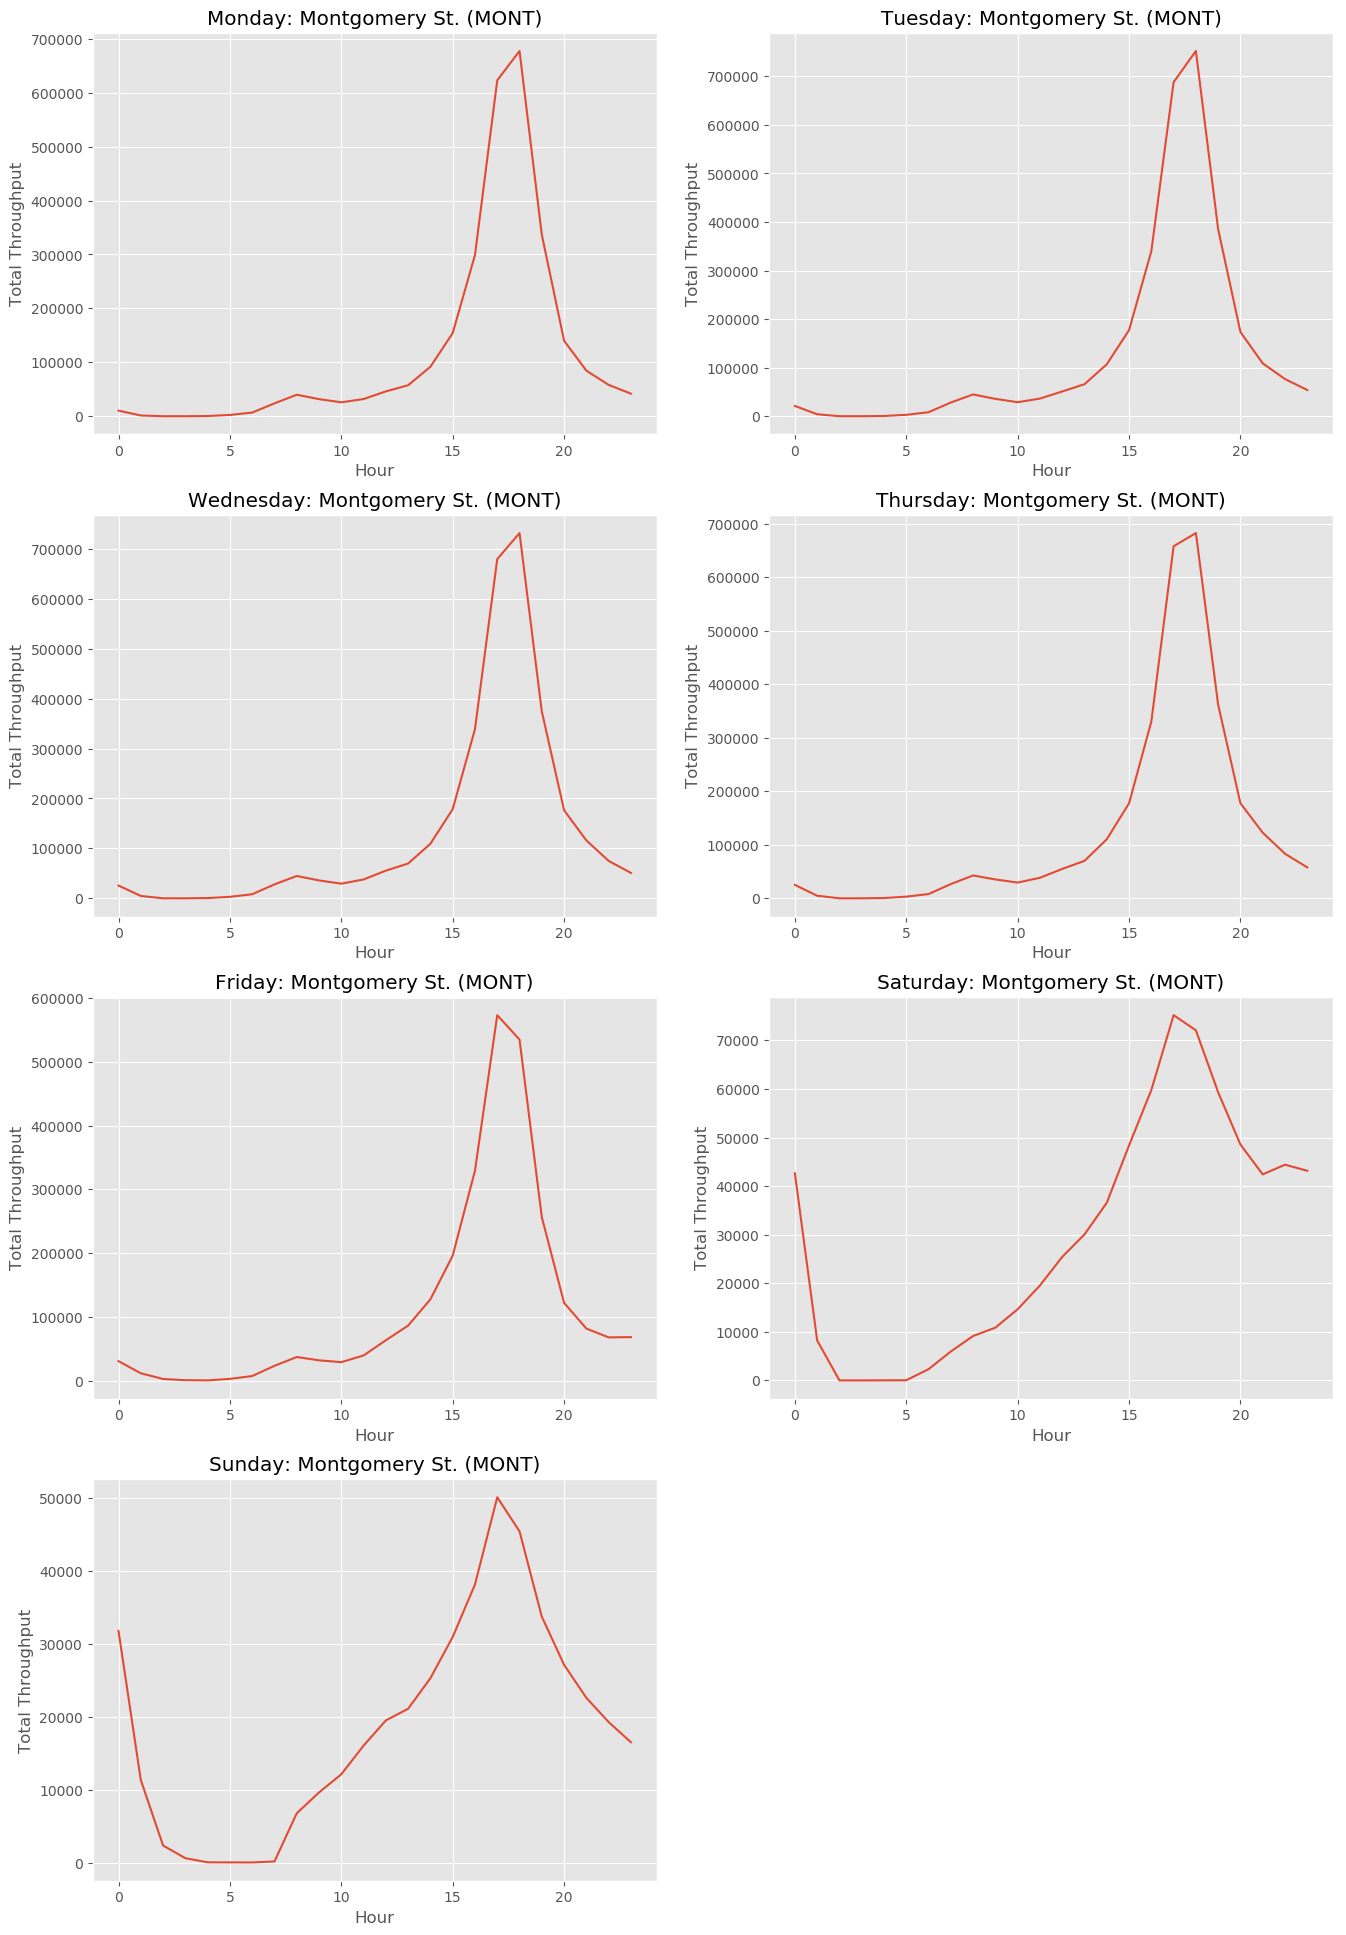

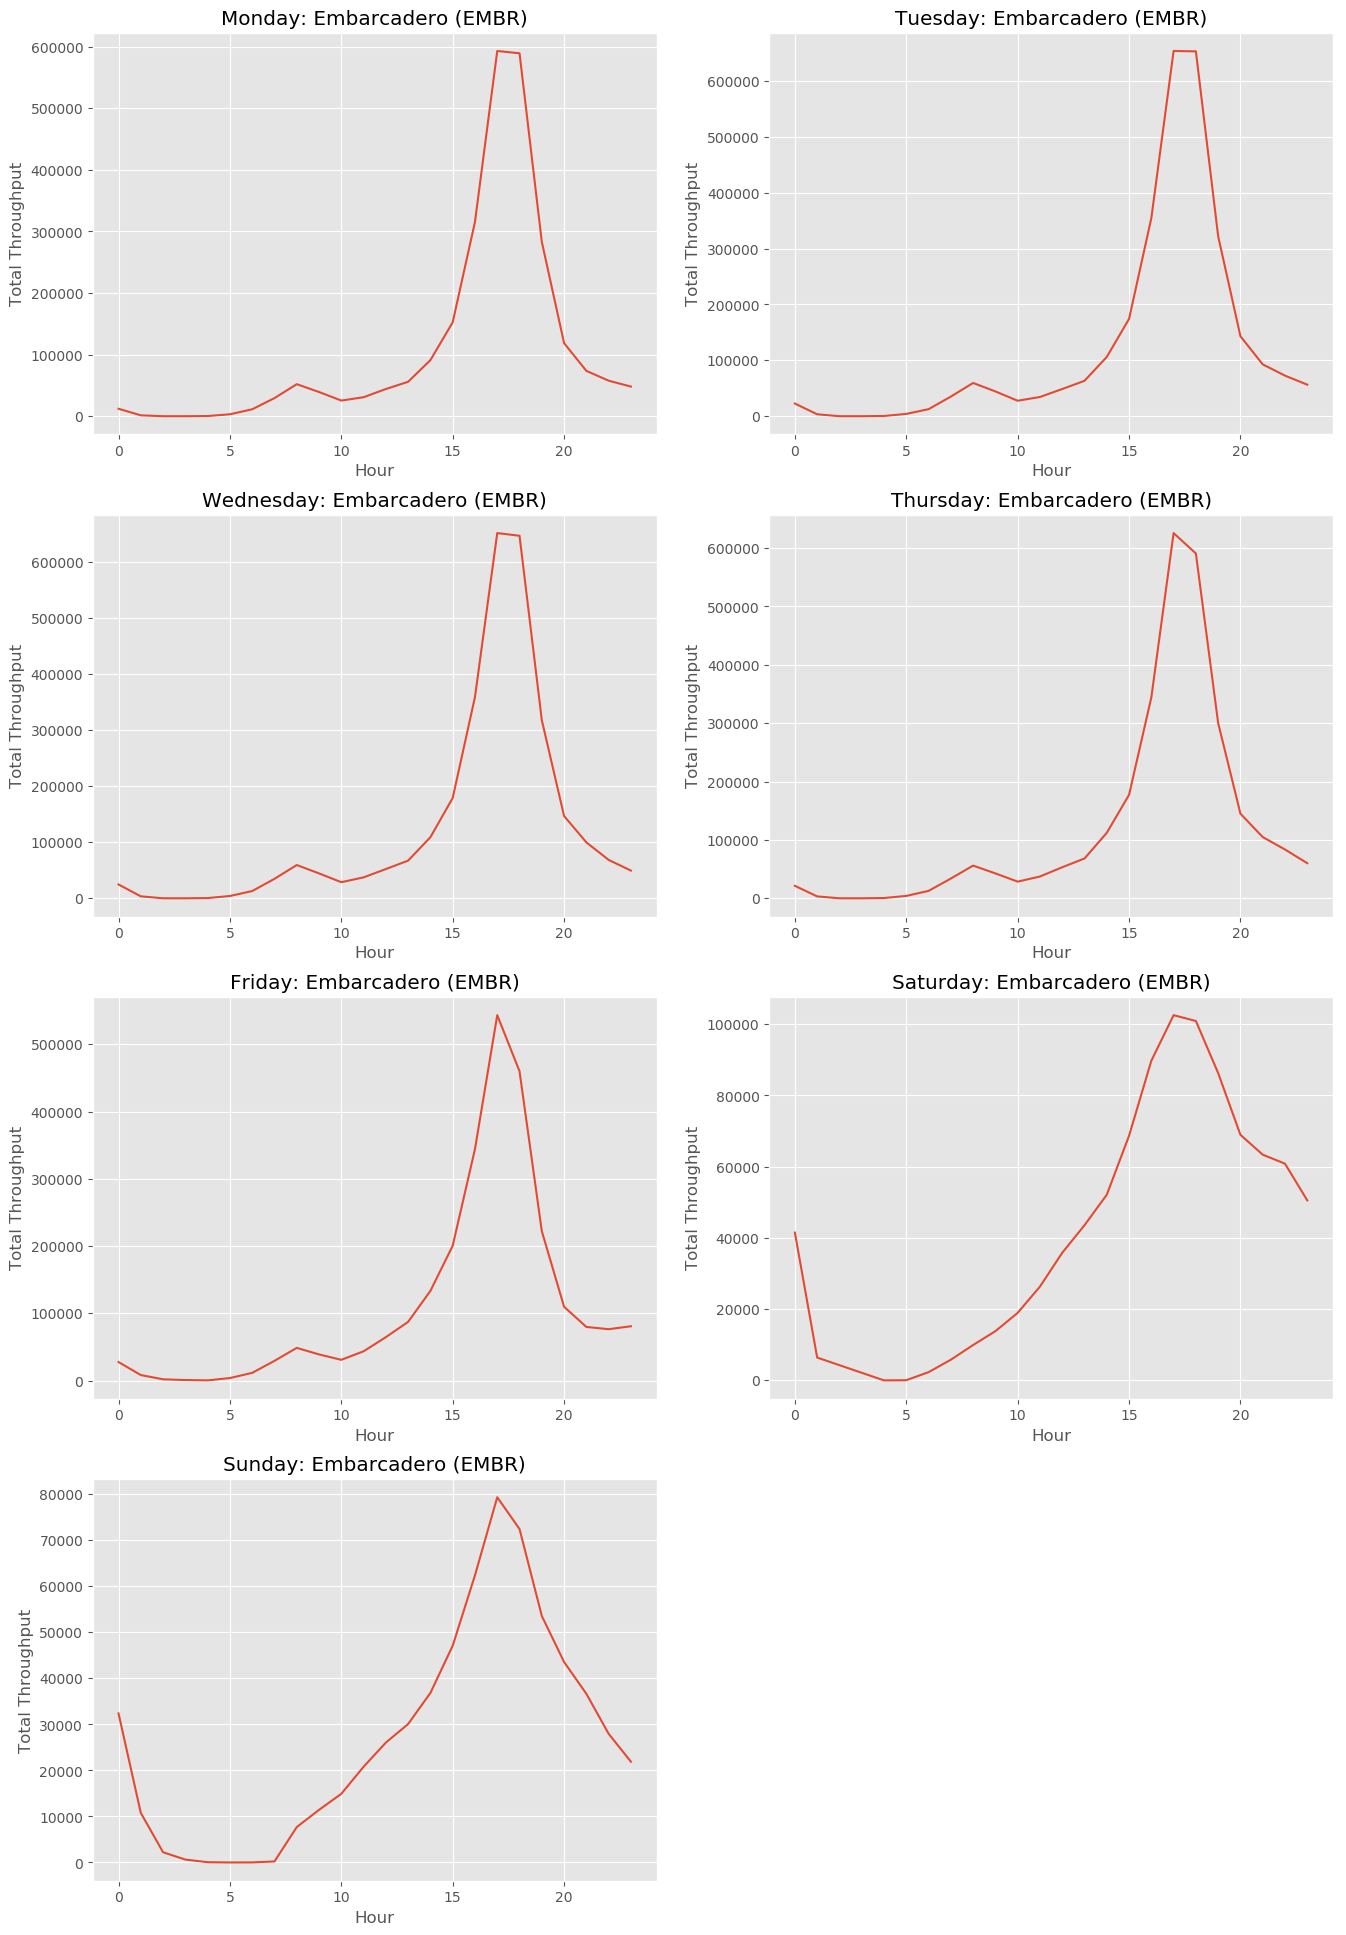

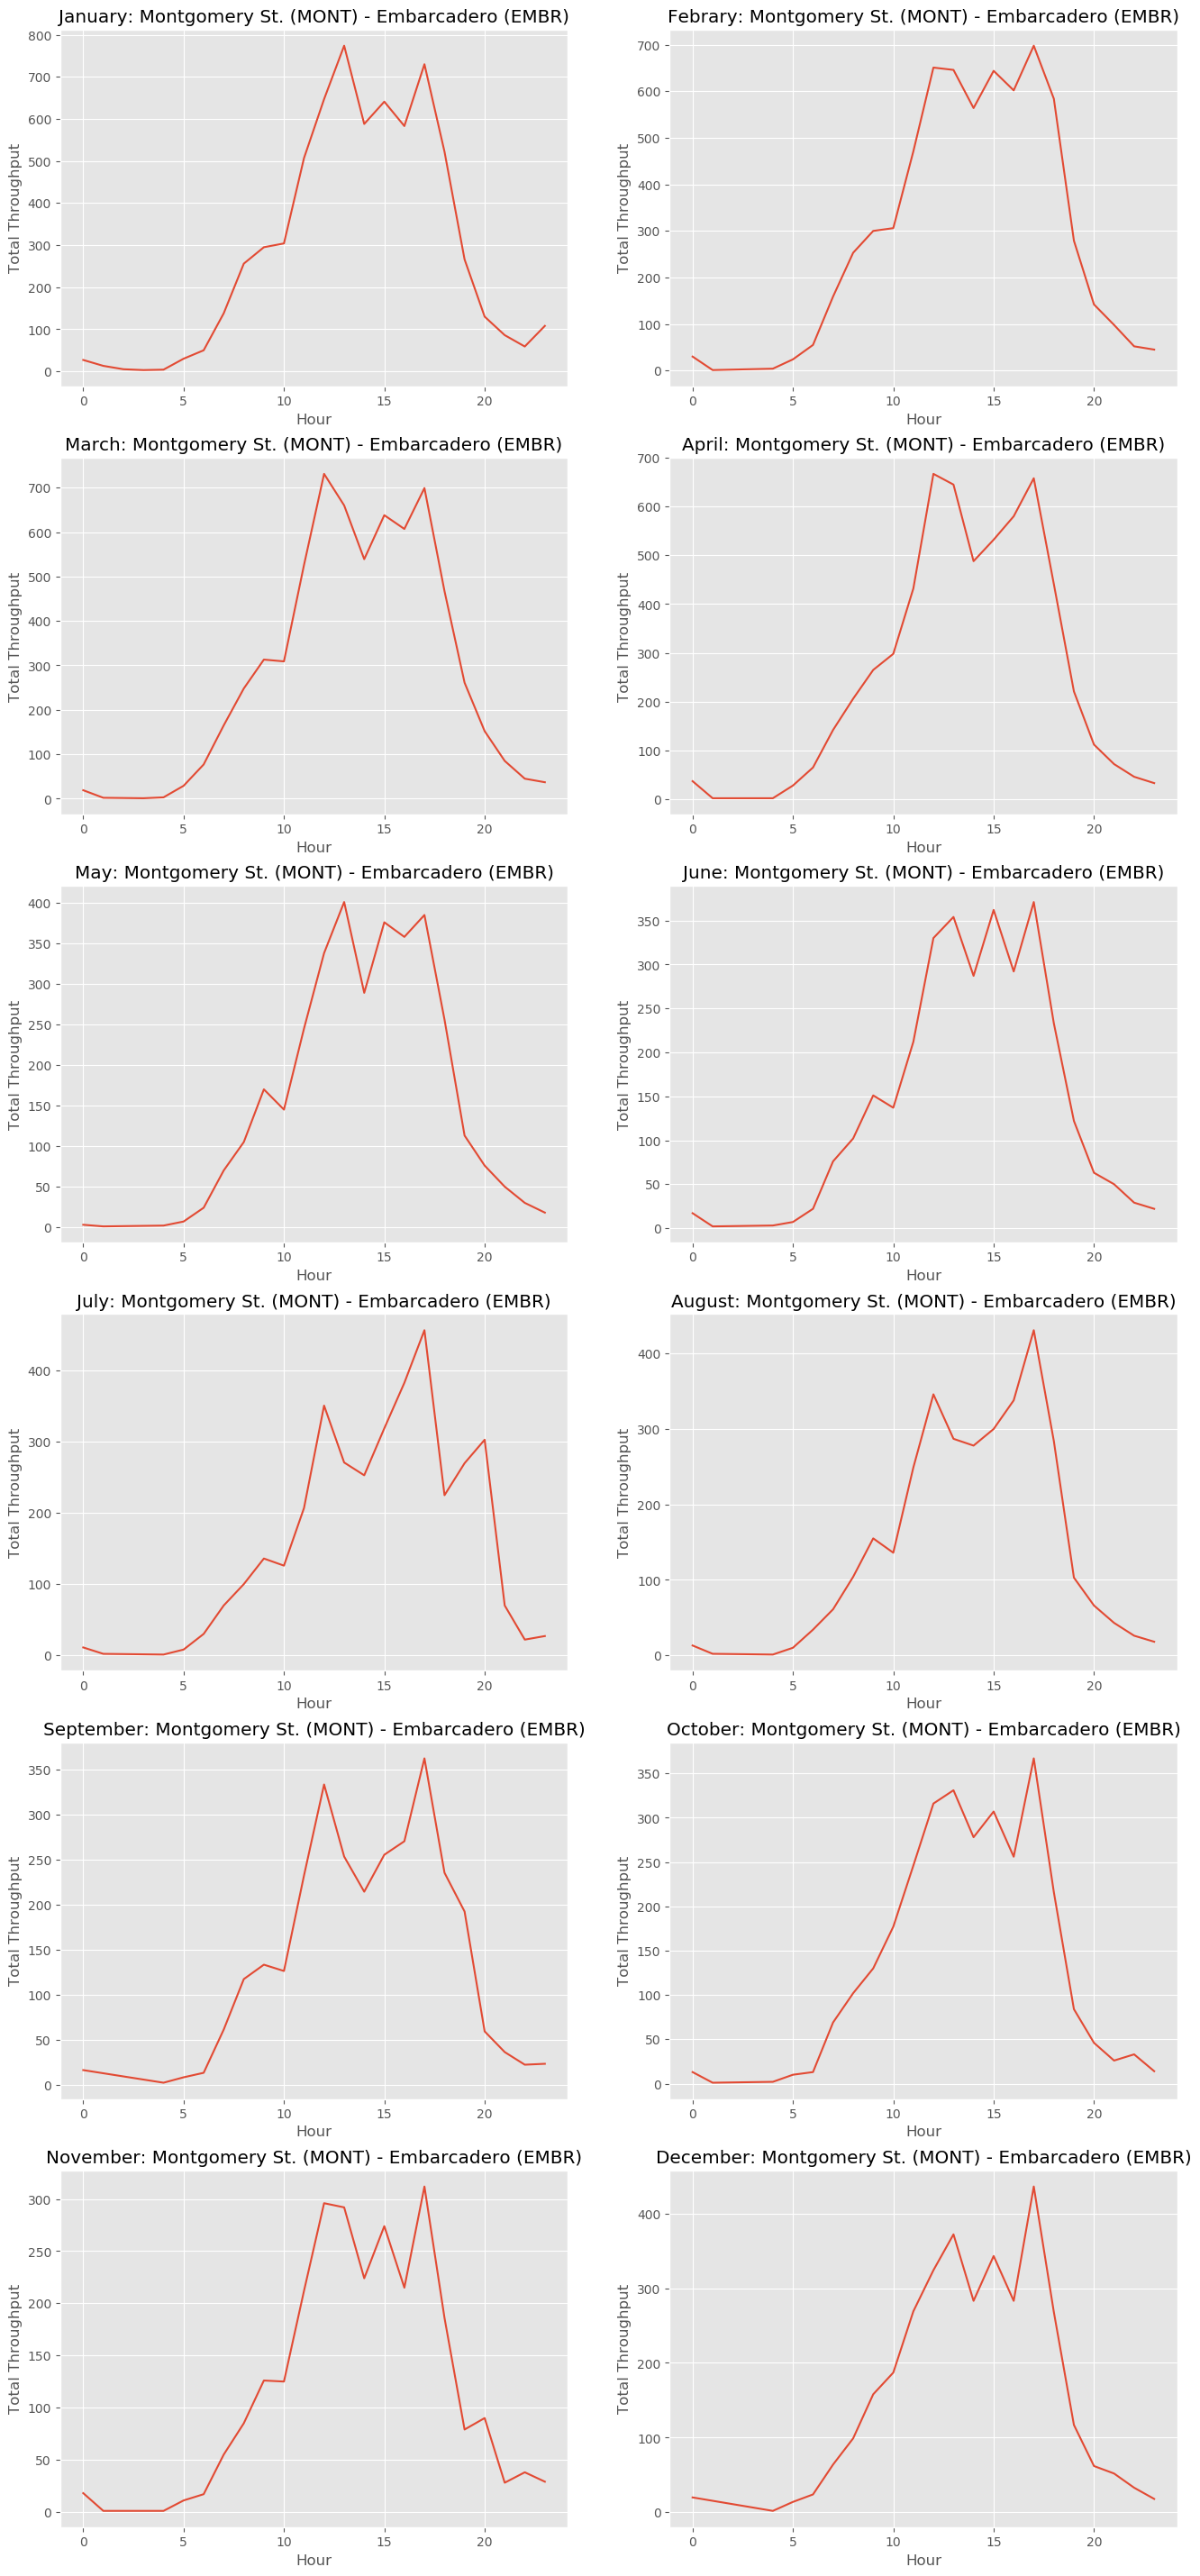

In [5]:
def visualize_bart(bart, stops, stat, class_type, group_by, plot_option):
    
    if len(stops) == 1:
        data = bart[bart['Origin'] == stops[0]]
    elif len(stops) == 2:
        origin, dest = stops
        data = bart[(bart['Origin'] == origin) & (bart['Destination'] == dest)]
    plt.style.use('ggplot')
    
    # Plot the throughput with respect to time (hour) each week/month
    if plot_option == 1 or group_by == 'hour':
        k = len(getattr(data['DateTime'].dt, class_type[0]).unique())
        n = 2                                 # number of columns
        m = math.ceil(k / n)  # number of rows
        plt.figure(figsize=(8 * n,  6 * m))
        for i in range(k):
            if class_type[0] == 'weekday':
                j = i
            else:
                j = i + 1
            grouped = data[getattr(data['DateTime'].dt, class_type[0]).values == j].groupby(getattr(data['DateTime'].dt, group_by)).sum()
            grouped.sort_index(inplace=True)
            plt.subplot(m, n, i + 1)
            plt.plot(grouped['Throughput'])
            if len(stops) == 1:
                tmp = stat[stat['Abbreviation'] ==  data.iloc[0]['Origin']]
                title = class_type[1][i] + ': {}'.format(tmp.iloc[0]['Name'])
            else:
                tmp_1 = stat[stat['Abbreviation'] ==  data.iloc[0]['Origin']]
                tmp_2 = stat[stat['Abbreviation'] ==  data.iloc[0]['Destination']]
                title = class_type[1][i] + ': {} - {}'.format(tmp_1.iloc[0]['Name'], tmp_2.iloc[0]['Name'])
            plt.title(title)
            plt.xlabel(group_by.title())
            ax = plt.gca()
            fig = plt.gcf()
            if group_by == 'date':
                xfmt = mpl.dates.DateFormatter('%Y-%m-%d')
                ax.xaxis.set_major_formatter(xfmt)
                # plt.xticks(rotation=90)
                fig.autofmt_xdate()
            plt.ylabel('Total Throughput')
            # plt.xticks(grouped.index, list(np.arange(24)))
            
    # Plot the throughput with respect to date
    elif plot_option == 2:  
        grouped = data.groupby(getattr(data['DateTime'].dt, group_by)).sum()
        grouped.sort_index(inplace=True)
        plt.figure(figsize=(8,  6))
        plt.plot(grouped['Throughput'])
        if len(stops) == 1:
            tmp = stat[stat['Abbreviation'] ==  data.iloc[0]['Origin']]
            title = '{}'.format(tmp.iloc[0]['Name'])
            # title = class_type[1][i] + ': {}'.format(data.iloc[0]['Origin'])
        else:
            tmp_1 = stat[stat['Abbreviation'] ==  data.iloc[0]['Origin']]
            tmp_2 = stat[stat['Abbreviation'] ==  data.iloc[0]['Destination']]
            title = '{} - {}'.format(tmp_1.iloc[0]['Name'], tmp_2.iloc[0]['Name'])
            # title = ': {} - {}'.format(data.iloc[0]['Origin'], data.iloc[0]['Destination'])
        # plt.legend()
        plt.xlabel(group_by.title())
        plt.ylabel('Throughput')
        plt.xticks(rotation=90)
        ax = plt.gca()
        fig = plt.gcf()
        xfmt = mpl.dates.DateFormatter('%Y-%m-%d')
        ax.xaxis.set_major_formatter(xfmt)
        # plt.xticks(rotation=90)
        fig.autofmt_xdate()
        plt.title(title)
        plt.ylim([0, 65000])

        
by_month = [
    'month',
    ['January', 'Febrary', 'March', 'April', 'May', 'June', 'July',
     'August', 'September', 'October', 'November', 'December']
]

by_weekday = [
    'weekday',
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
    'Friday', 'Saturday', 'Sunday']
]

origins = [
    'MONT', 'EMBR', 'POWL', 'CIVC', '24TH', '16TH', '12TH',
    'DBRK', '19TH', 'BALB', 'DALY', 'MCAR', 'FRMT', 'DELN',
    'FTVL', 'DUBL', 'GLEN', 'WOAK', 'SFIA', 'COLS', 'PHIL',
    'LAKE', 'MLBR', 'WCRK', 'PITT', 'CONC', 'SANL', 'BAYF',
    'ROCK', 'ASHB', 'PLZA', 'HAYW', 'UCTY', 'NBRK', 'RICH',
    'COLM', 'SBRN', 'SSAN', 'LAFY', 'WDUB', 'SHAY', 'CAST',
    'ORIN', 'NCON', 'OAKL'
]

origins = origins[0:2]

for origin in origins:
    stops = [origin]
    visualize_bart(bart, stops, stat, by_month, 'date', 2)

for origin in origins:
    stops = [origin]
    visualize_bart(bart, stops, stat, by_weekday, 'hour', 2)
    
for i in range(len(origins) - 1):
    stops = [origins[i], origins[i+1]]
    visualize_bart(bart, stops, stat, by_month, 'hour', 1)

In [6]:
bart_16.head()

,Origin,Destination,Throughput,DateTime,Date,Time,DayOfWeek
0,12TH,12TH,1,2016-01-01,2016-01-01,00:00:00,Friday
1,12TH,16TH,1,2016-01-01,2016-01-01,00:00:00,Friday
2,12TH,24TH,4,2016-01-01,2016-01-01,00:00:00,Friday
3,12TH,ASHB,4,2016-01-01,2016-01-01,00:00:00,Friday
4,12TH,BALB,2,2016-01-01,2016-01-01,00:00:00,Friday


In [7]:
bart_16 = pd.read_csv(date_hour_2016)
bart_16.head()

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00
1,12TH,16TH,1,2016-01-01 00:00:00
2,12TH,24TH,4,2016-01-01 00:00:00
3,12TH,ASHB,4,2016-01-01 00:00:00
4,12TH,BALB,2,2016-01-01 00:00:00


In [20]:
stat = pd.read_csv(stat_info)
stat.dtypes
stat.Location.dtypes

dtype('O')

In [17]:
stat = stat_preprocess(pd.read_csv(stat_info))
stat.dtypes

Abbreviation     object
Name             object
Longitude       float64
Latitude        float64
Description      object
dtype: object